# Comparison of Original IForestASD, SADWIN IFA, PADWIN IFA, and NDKSWIN

L'objectif est de voir comment les 4 méthodes se comportent avec différents jeux de données.
* SAWIN IFA (Scores based ADWIN on IForestASD) utilise le score des données sur la base du modèle créé avec IForest ASD dans les fenêtres précédentes. Ce score est utilisé par ADWIN pour vérifier si le modèle drift pour pas. Une fois le drift détecté, le modèle est mis à jour sur la base de la fenêtre courante et l'ancien modèle est totalement supprimé.
* PAWIN IFA (Prediction based ADWIN on IForestASD) utilise la classification des données sur la base du modèle créé avec IForest ASD dans les fenêtres précédentes. Cette classification est utilisée par ADWIN pour vérifier si le modèle drift pour pas. Une fois le drift détecté, le modèle est mis à jour sur la base de la fenêtre courante et l'ancien modèle est totalement supprimé.
* NDKSWIN IFA (N-Dimensional KSWIN on IForestASD) utilise les données de la fenêtre courante pour détecter si elles drift sur au moins une colonne. NDKSWIN est une adaptation de KSWIN de scikit-multiflow pour les données à n dimensions. Une fois le drift détecté, le modèle est mis à jour sur la base de la fenêtre courante et l'ancien modèle est totalement supprimé.

## Install skmultiflow if needed
You need to install git

In [1]:
#print("scikit-multiflow package installation")
#!pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

In [2]:
try:
    import skmultiflow
except ImportError as e:
    print("scikit-multiflow package installation")
    !pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

## Importations and configurations

In [3]:
%matplotlib notebook
import matplotlib as plt
plt.interactive(True)
from source import functions
func = functions.Comparison()
import datetime
#from skmultiflow.data import AnomalySineGenerator

## General parameters for the evaluation

In [4]:
#************************ Execution settings *******************************
window_sizes = [100, 500]
n_estimators = [30]
#window_sizes = [50]
#n_estimators = [20]
#window = 100 # Number of sample in one window, window size.
#n_estimator = 30 # Number of itree in the random forest
execution_number = 1 # Number of execution because of the random character of IForest
anomaly_threshold = 0.5 # Anomaly threshold to decide which is anomaly or not
max_sample = 10000 # Total size of data to examine (windows number = max_sample/window)
n_wait = max_sample # The evaluation step size
# Used metric in the evaluation. Attention to use the metrics availlable in skmultiflow
metrics=['accuracy', 'f1', 'precision', 'recall', 'true_vs_predicted', 'kappa', 'kappa_m', 'running_time', 'model_size']

#************************ Stream data settings *******************************
window_save_size = 100
window_number = round((max_sample/window_save_size),0) # The number of window to save on .csv file

# Parameters for NDWSIN IFA
alpha=0.01
n_dimensions=2 # Number of dimensions to use for the test of the drift concept (normally 50% of m)
n_tested_samples=0.1 # Percentage of data to pick in the window to test the drift concept
fixed_checked_dimension = False # IF False, dimension will be choose randomly, if not on the 
fixed_checked_sample=False

## Execution Function

In [5]:
def execute_comparision():
    for window in window_sizes:
        for n_estimator in n_estimators:
            print("")
            print("******************************** Window = "+str(window)+" and n_estimator = "+str(n_estimator)+" ********************************")
            func.run_IForestASDs_comparison(execution_number=execution_number, stream=stream, stream_n_features=stream.n_features, window = window, 
                             estimators = n_estimator, anomaly = anomaly_threshold, drift_rate = drift_rate, 
                             result_folder=test_name, max_sample=max_sample, n_wait=n_wait, metrics=metrics,
                             #n_estimators_updated=n_estimators_updated, updated_randomly=updated_randomly,
                            alpha=alpha, n_dimensions=n_dimensions, n_tested_samples=n_tested_samples,
                            fixed_checked_dimension = fixed_checked_dimension, fixed_checked_sample=fixed_checked_sample)
    
    directory_path = 'results/'+str(test_name)
    func.merge_file2(folder_path=directory_path, output_file = 'output.csv',skiprows=(4 + 4))

## Applied On Simple Stream Dataset
### Idea and waitting results
### Results
#### Model updating
#### Method performances

### Summary


******************************** Window = 100 and n_estimator = 30 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>


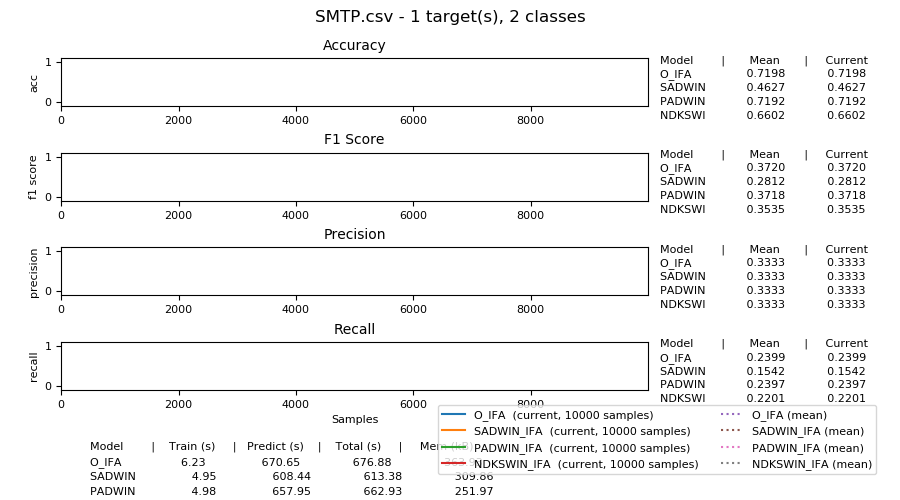

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...

The model was updated by training a new iForest with the version : AnomalyRate


/home/momo/.local/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:361: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m



The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : PADWIN

The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN


/home/momo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:6265: RuntimeWarning: ks_2samp: Exact calculation incurred large rounding error. Switching to mode=asymp
  RuntimeWarning)


 #------------------- [5%] [92.90s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : PADWIN

The model was updated by training a new iForest with the version : AnomalyRate
 ##------------------ [10%] [211.05s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN

The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the


The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : AnomalyRate
 ##################-- [90%] [2347.60s]
The model was updated by training a new iForest with the version : NDKSWIN

The model was updated by training a new iForest with the version : PADWIN
 ###################- [95%] [2479.72s]
The model was updated by training a new iForest with the version : AnomalyRate
 #################### [100%] [2603.64s]
Processed samples: 10000
Mean performance:
O_IFA - Accuracy     : 0.7198
O_IFA - Precision: 0.3333
O_IFA - Recall: 0.2399
O_IFA - F1 score: 0.3720
O_IFA - Training time (s)  : 6.23
O_IFA - Testing time  (s)  : 670.65
O_IFA - Total time    (s)  : 676.88
O_IFA - Size (kB)          : 363.9326
SADWIN_IFA - Accuracy     : 0.4627
SADWIN_IFA - Precision: 0.3333
SADWIN_IFA - Recall: 0.1542
SADWIN_IFA - F1 score: 0.2812
SADWIN_IFA - Training time (s)  : 4.95
SADWIN_IFA - Testing time  (s)  : 608.4

<IPython.core.display.Javascript object>


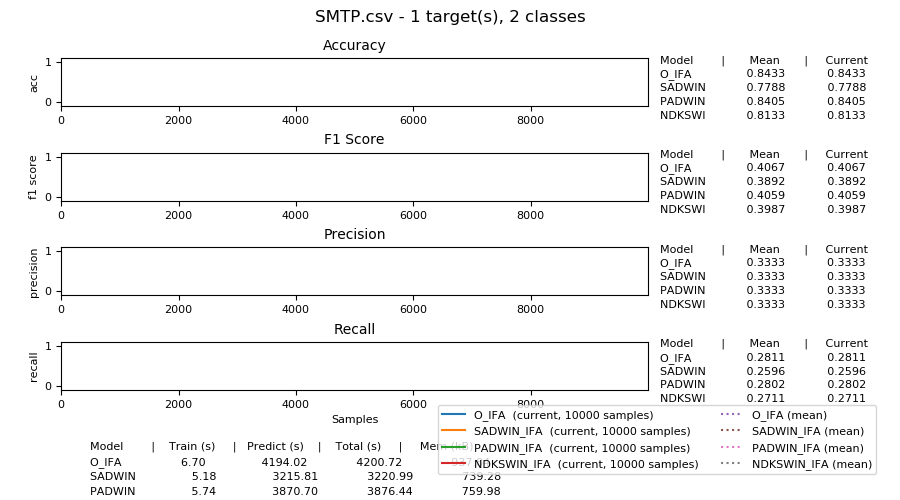

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #------------------- [5%] [0.03s]
The model was updated by training a new iForest with the version : AnomalyRate


/home/momo/.local/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:361: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##------------------ [10%] [706.47s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ###----------------- [15%] [1423.37s]
The model was updated by training a new iForest with the version : AnomalyRate
 ####---------------- [20%] [2205.59s]
The model was updated by training a new iForest with the version : AnomalyRate
 #####--------------- [25%] [2953.85s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [3671.33s]
The model was updated by training a new iForest with the version : AnomalyRate
 #######------------- [35%] [4425.36s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [5196.17s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : PADWIN
 #########----------- [4

In [6]:
metrics=['accuracy', 'f1', 'precision', 'recall', 'running_time', 'model_size']
dataset_name = "SMTP"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.03
stream = func.get_dataset(dataset_name=dataset_name)

execute_comparision()